/home/heng.li/repo/cortexia/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


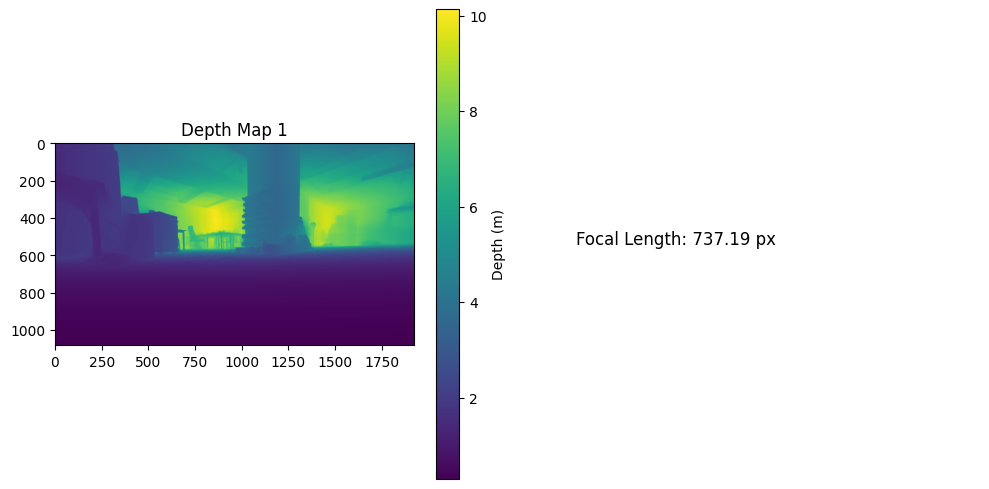

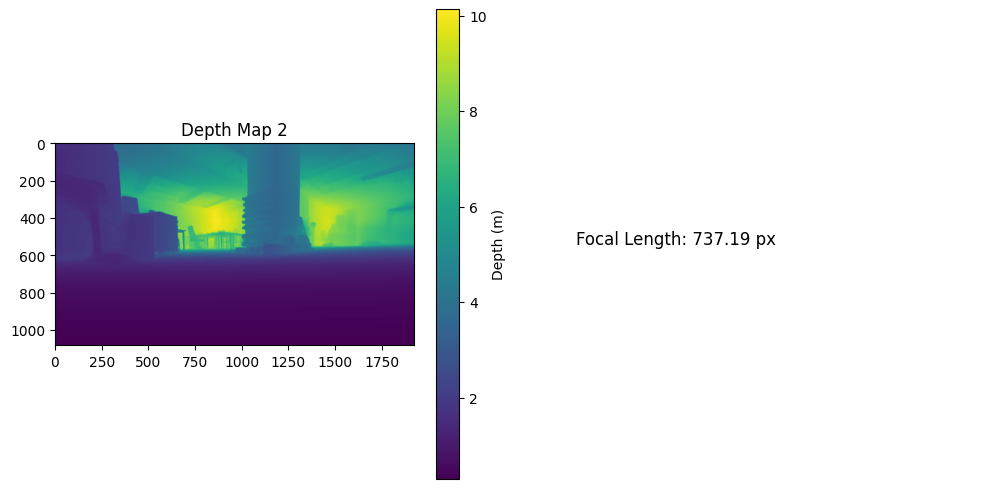

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from cortexia.depth_estimation import DepthProEstimator

def main():
    # Initialize depth estimator
    depth_estimator = DepthProEstimator()
    
    # Path to test image
    image_path = "/home/heng.li/repo/cortexia/data/frame_0025_rgb.png"

    # Test batch processing with the same image multiple times
    image_paths = [image_path] * 2  # Process same image twice to test batching
    
    # Estimate depth
    results = depth_estimator.estimate_batch_depth(image_paths)
    
    # Visualize results
    for i, result in enumerate(results):
        depth_map = result['depth']
        focal_length = result['focallength_px']
        
        plt.figure(figsize=(10, 5))
        
        # Plot depth map
        plt.subplot(1, 2, 1)
        plt.imshow(depth_map, cmap='viridis')
        plt.colorbar(label='Depth (m)')
        plt.title(f'Depth Map {i+1}')
        
        # Text info
        plt.subplot(1, 2, 2)
        plt.text(0.1, 0.5, f'Focal Length: {focal_length:.2f} px', fontsize=12)
        plt.axis('off')
        
        plt.tight_layout()
    
    plt.show()

if __name__ == "__main__":
    main()

In [3]:
import numpy as np
# Initialize depth estimator
depth_estimator = DepthProEstimator()

# Path to test image
image_path = "/home/heng.li/repo/cortexia/data/frame_0025_rgb.png"

# Test batch processing with the same image multiple times
image_paths = [image_path] * 2 # Process same image twice to test batching

# Estimate depth
results = depth_estimator.estimate_batch_depth(image_paths)

np.save('depth_map.npy', results[0]['depth'])